In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec


In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# BOSE HUBBARD

In [3]:
path = "data/BH_phase-diagrams-and-loss/data_rike/"

x = np.load(path + "x.npy")
y = np.load(path + "y.npy")
es = np.load(path + "es2.npy")
dd = np.load(path + "dd2.npy")
cost0 = np.load(path + "cost_bh_L12_trash2_d48_v5_seed17.npy")
cost1 = np.load(path + "cost_bh_L12_trash4_d25_v47_seed16.npy")
cost2 = np.load(path + "cost_bh_L12_trash6_d10_v10_seed22.npy")

vs = np.logspace(-2,2,50)
ds = np.linspace(-0.95,0.95,50)

AxesSubplot(0.125,0.510532;0.119631x0.369468)


/home/joana/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


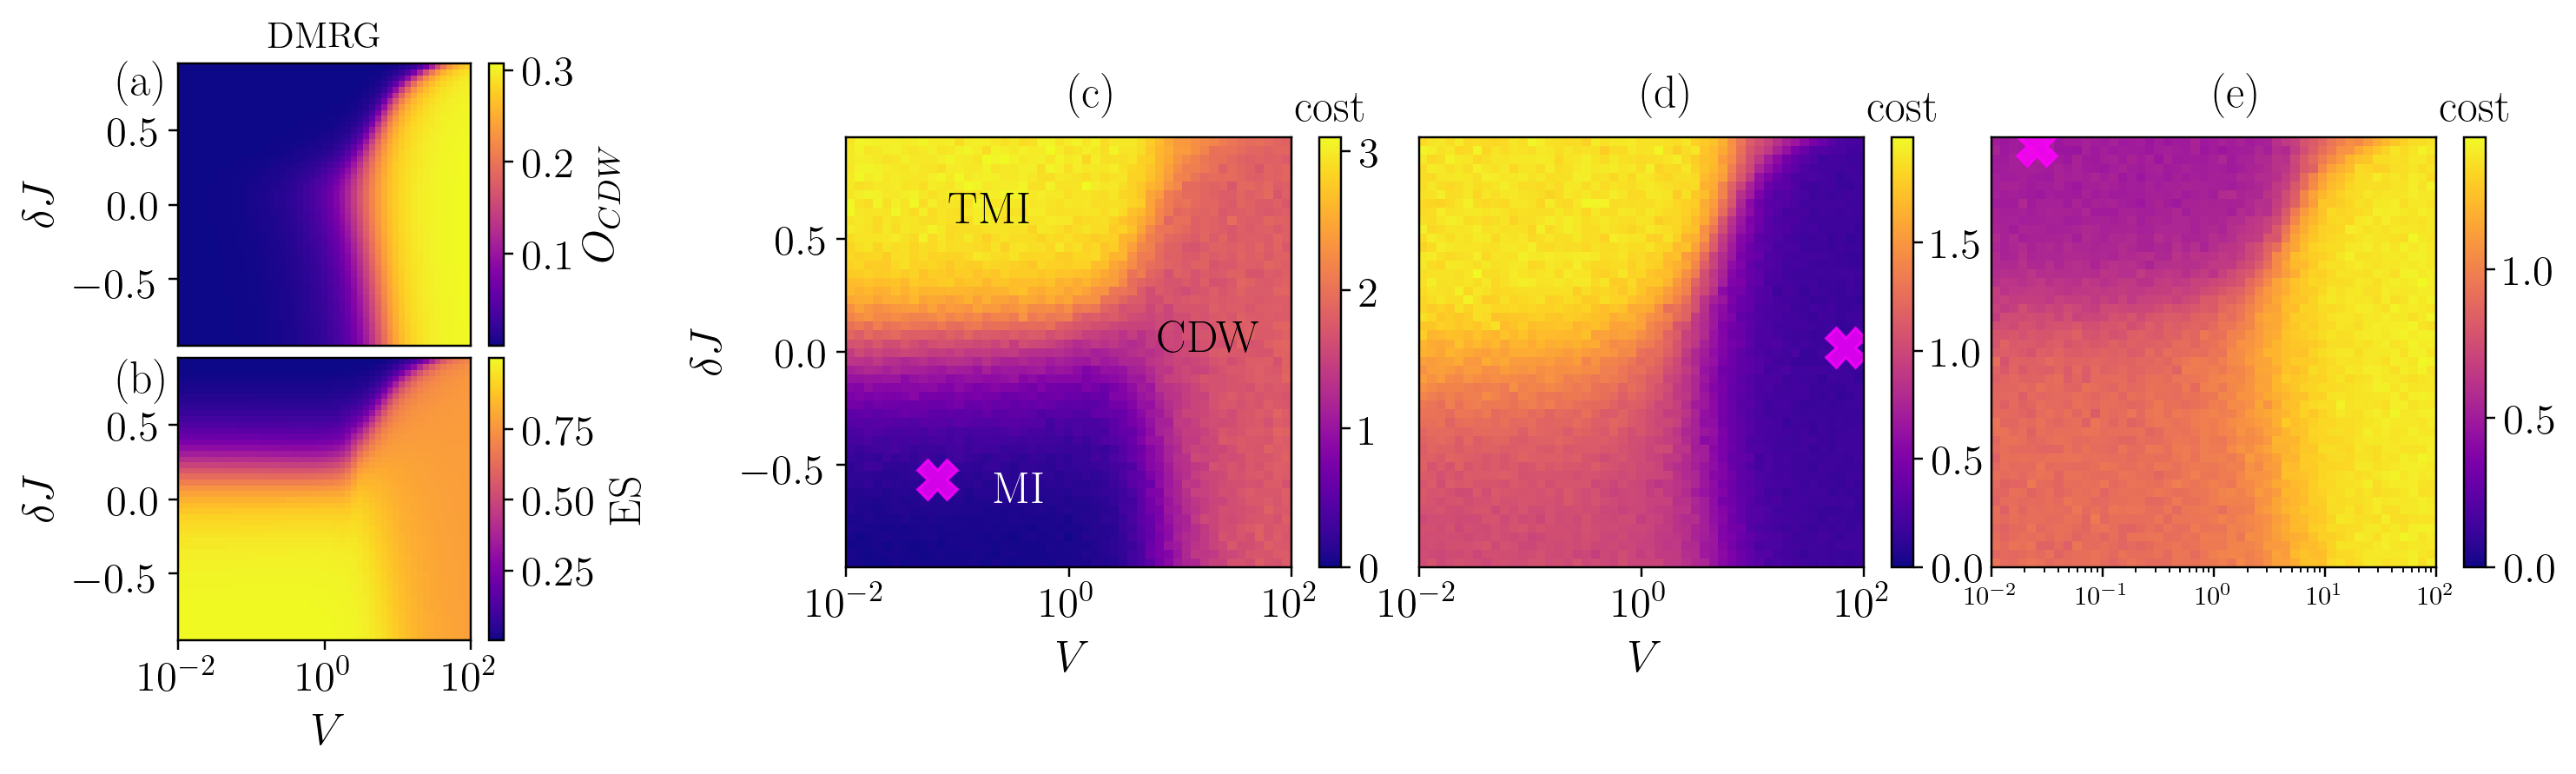

In [4]:
fig,aa = plt.subplots(figsize=(16,4),sharey="row",dpi=220)

fs_labels = 17
fs_ticks = 16

ax00 = plt.subplot2grid(shape=(8,25), loc=(0, 0), rowspan=4, colspan=4, xticklabels=[])
ax10 = plt.subplot2grid(shape=(8,25), loc=(4, 0), rowspan=4, colspan=4, xticklabels=[])
ax01 = plt.subplot2grid(shape=(8,25), loc=(1, 7), rowspan=6, colspan=6, xticklabels=[])
ax02 = plt.subplot2grid(shape=(8,25), loc=(1, 13), rowspan=6, colspan=6, xticklabels=[], yticklabels=[])
ax03 = plt.subplot2grid(shape=(8,25), loc=(1, 19), rowspan=6, colspan=6, xticklabels=[], yticklabels=[])

cmap = plt.get_cmap("plasma") #'viridis'
cbar_labelsize = 10
cbar = np.zeros((2,2), dtype="object")

axs=np.array([[ax00,ax10],[ax01,ax02]])
print(axs[0,0])

for ax in axs.flatten():
    ax.tick_params(labelsize=fs_ticks)

ax = axs[0,0]
axs[0,0].set_title("DMRG", fontsize=14)
im = ax.pcolormesh(x,y,dd.T, cmap=cmap, shading="auto",rasterized=True) #,rasterized=True necessary for pdf export
#im.ax.tick_params(labelsize=cbar_labelsize)
ax.set_xscale("log")
cbar[0,0] = fig.colorbar(im, ax=ax)
cbar[0,0].ax.tick_params(labelsize=fs_ticks)
cbar[0,0].ax.set_ylabel("$O_{CDW}$",fontsize=fs_labels)
axs[0,0].set_ylabel(r"$\delta J$",fontsize=fs_labels)
ax.set_xticks([], minor=True)
ax.set_xticks([], minor=False)

ax = axs[0,1]
im = ax.pcolormesh(x,y,es.T, cmap=cmap, shading="auto",rasterized=True)
ax.set_xscale("log")
cbar[0,1] = fig.colorbar(im, ax=ax)
cbar[0,1].ax.tick_params(labelsize=fs_ticks)
cbar[0,1].ax.set_ylabel("ES",fontsize=fs_labels)
axs[0,1].set_xlabel(r"$V$",fontsize=fs_labels)
axs[0,1].set_ylabel(r"$\delta J$",fontsize=fs_labels)

ax = axs[1,0]
im = ax.pcolormesh(x,y,cost2.T,vmin=0, cmap=cmap, shading="auto",rasterized=True)
ax.set_xscale("log")
cbar[1,0] = fig.colorbar(im, ax=ax)
cbar[1,0].ax.tick_params(labelsize=fs_ticks)
ax.plot(vs[10],ds[10],"X", color="magenta",markersize=15, alpha=0.8)
axs[1,0].set_xlabel(r"$V$",fontsize=fs_labels)
axs[1,0].set_ylabel(r"$\delta J$",fontsize=fs_labels)

ax = axs[1,1]
im = ax.pcolormesh(x,y,cost1.T,vmin=0, cmap=cmap, shading="auto",rasterized=True)
ax.set_xscale("log")
cbar[1,1] = fig.colorbar(im, ax=ax)
cbar[1,1].ax.tick_params(labelsize=fs_ticks)
cbar[1,1].ax.set_title("cost", fontsize=fs_labels)
ax.plot(vs[47],ds[25],"X", color="magenta",markersize=15, alpha=0.8)
axs[1,1].set_xlabel(r"$V$",fontsize=fs_labels)
ax.set_yticks([])

ax = ax03
im = ax.pcolormesh(x,y,cost0.T,vmin=0, cmap=cmap, shading="auto",rasterized=True)
ax.set_xscale("log")
cbar[1,1] = fig.colorbar(im, ax=ax)
cbar[1,1].ax.tick_params(labelsize=fs_ticks)
cbar[1,1].ax.set_title("cost", fontsize=fs_labels)
ax.plot(vs[5],ds[48],"X", color="magenta",markersize=15, alpha=0.8)
axs[1,1].set_xlabel(r"$V$",fontsize=fs_labels)
ax.set_yticks([])

plt.tight_layout()

# has to happen after tight_layout()
axs[0,0].text(-0.21,0.89,"(a)", fontweight="bold", size=fs_labels, transform = axs[0,0].transAxes)
axs[1,0].text(0.5,1.07,"(c)", fontweight="bold", size=fs_labels, transform = axs[1,0].transAxes)
axs[0,1].text(-0.21,0.88,"(b)", fontweight="bold", size=fs_labels, transform = axs[0,1].transAxes)
axs[1,1].text(0.5,1.07,"(d)", fontweight="bold", size=fs_labels, transform = axs[1,1].transAxes)
ax03.text(0.5,1.07,"(e)", fontweight="bold", size=fs_labels, transform = ax03.transAxes)

axs[1,0].text(0.33,0.15,"MI", fontweight="bold", size=fs_labels, transform = axs[1,0].transAxes, color="white")
axs[1,0].text(0.23,0.8,"TMI", fontweight="bold", size=fs_labels, transform = axs[1,0].transAxes)
axs[1,0].text(0.7,0.5,"CDW", fontweight="bold", size=fs_labels, transform = axs[1,0].transAxes)

cbar[1,0].ax.set_title("cost", fontsize=fs_labels)

plt.savefig("plots/BH_paper.pdf", bbox_inches='tight')

# ISING NOISY 2D

In [25]:
cost = np.load("data/ibmq_antiferro-2D_load-AD_10x10_noisy-rome-simu_thetas-loss-cost_run1.npy",allow_pickle=True)
qmag = np.load("data/noisy_rome_simu_VQE_maxiter-500_Ising_L5_anti_-1_10x10.npz", allow_pickle=True)["Qmag"].reshape(10,10)
x,y = np.logspace(-2,2,10), np.logspace(-2,2,10)
x,y = np.meshgrid(x,y)

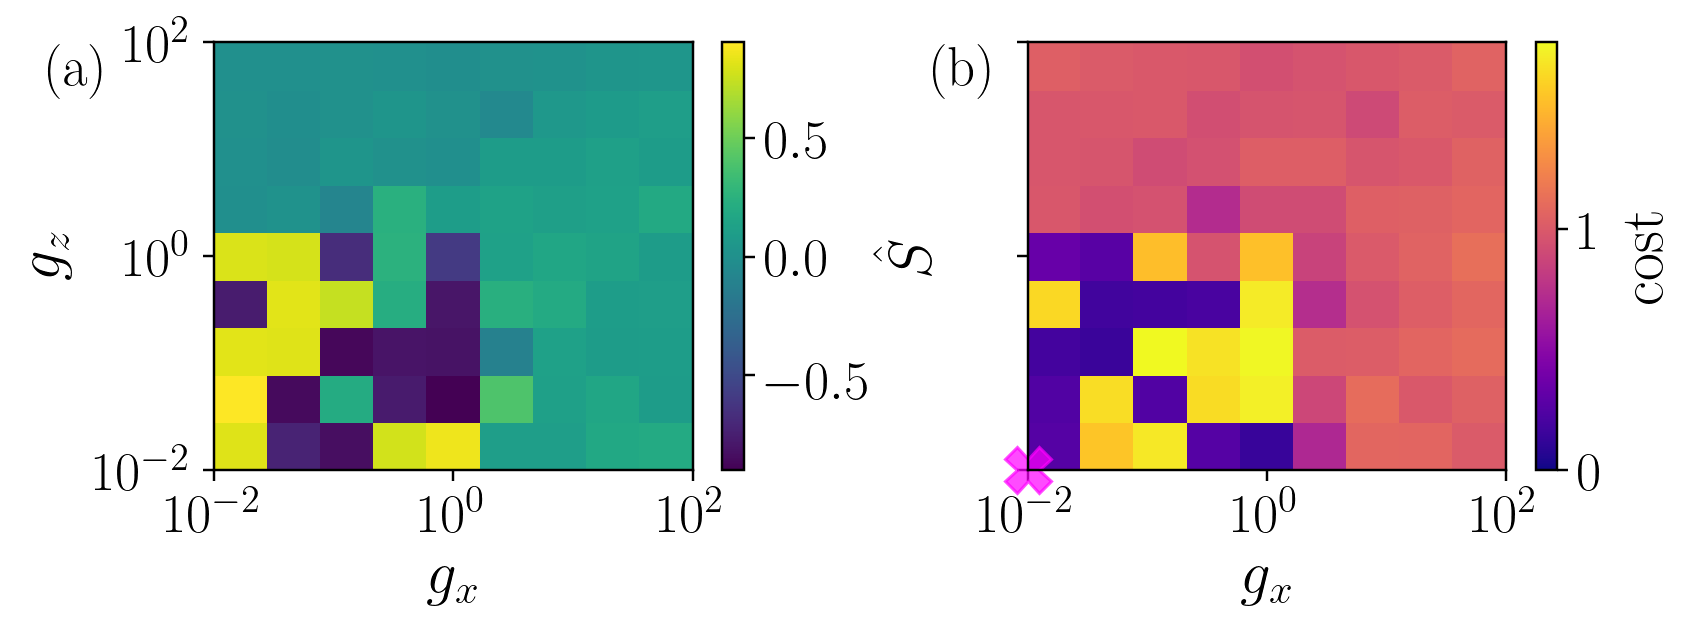

In [33]:
fig,axs = plt.subplots(ncols=2, nrows=1,figsize=(8,3),sharex=True, sharey=True, dpi=220)

cmap1 = plt.get_cmap("viridis") 
cmap2 = plt.get_cmap("plasma") 
cbar_labelsize = 18
cbar = np.zeros((2), dtype="object")

ax0 = axs[0]
im = ax0.pcolormesh(x, y, qmag, cmap=cmap1, shading="auto", rasterized=True) #,rasterized=True necessary for pdf export
cbar[0] = fig.colorbar(im, ax=ax0)
cbar[0].ax.tick_params(labelsize=cbar_labelsize)
cbar[0].ax.set_ylabel("$\hat{S}$",fontsize=20)

ax1 = axs[1]
im = ax1.pcolormesh(x, y, cost,vmin=0, cmap=cmap2, shading="auto",rasterized=True)
cbar[1] = fig.colorbar(im, ax=ax1)
cbar[1].ax.tick_params(labelsize=cbar_labelsize)
cbar[1].ax.set_ylabel("cost",fontsize=20)
#ax.plot(vs[47],ds[25],"x", color="magenta")

ax1.plot(1e-2,1e-2,"X", color="magenta",markersize=15, alpha=0.7, clip_on=False)

ax0.set_yscale("log")
ax0.set_yscale("log")
ax1.set_xscale("log")
ax0.set_xscale("log")
ax0.tick_params(labelsize=18)
ax1.tick_params(labelsize=18)
ax1.set_xlabel(r"$g_x$",fontsize=20)
ax0.set_ylabel(r"$g_z$",fontsize=20)
ax0.set_xlabel(r"$g_x$",fontsize=20)

#ax1.set_yticks([], minor=True)
#ax1.set_yticks([], minor=False)

plt.tight_layout()

# has to happen after tight_layout()
axs[0].text(-0.35,0.9,"(a)", fontweight="bold", size=18, transform = axs[0].transAxes)
axs[1].text(-0.2, 0.9,"(b)", fontweight="bold", size=18, transform = axs[1].transAxes)

plt.savefig("plots/antiferro2D_paper.pdf", bbox_inches='tight')

# ISING REAL MACHINE

In [5]:
anti = -1
L = 5
num_trash = 2

name = "ibmq_antiferro-1D-load_bogota-optimize-20points" # 01.06.2021 experiment
filename = "data/noisy_VQE_maxiter-500_Ising_L5_anti_-1_20" #"data/noisy_VQE_maxiter-100_Ising_L5_anti_-1_20_recycle"
print("filename: ", filename, "notebook name: ", name)

# where to get the simulated thetas values from? needs to contain a thetas_mitigated array
filename_simulated_thetas = 'data/ibmq_antiferro-1D-load_bogota-optimize_thetas-loss-cost_run2.npz'

# this is noisy simulation data
L = 5
num_trash = 2
anti = -1

VQE_params = np.load(filename + ".npz", allow_pickle=True)
pick = np.arange(0,len(VQE_params['gx_list']))
gx_list = VQE_params['gx_list'][pick]
gz_list = VQE_params['gz_list'][pick]
opt_params = VQE_params['opt_params'][pick]
Qmags = VQE_params["Qmag"][pick]
Qen = VQE_params["Qen"][pick]
Sen = VQE_params["Sen"][pick]
Smags = VQE_params["Smag"][pick]

temp = np.load("data/" + name + "executed_mags-Es.npz",allow_pickle=True)
Qmags_executed = temp["Qmags"]
    
gx_vals = np.unique(gx_list)
gz_vals = np.unique(gz_list)

filename:  data/noisy_VQE_maxiter-500_Ising_L5_anti_-1_20 notebook name:  ibmq_antiferro-1D-load_bogota-optimize-20points


/home/joana/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


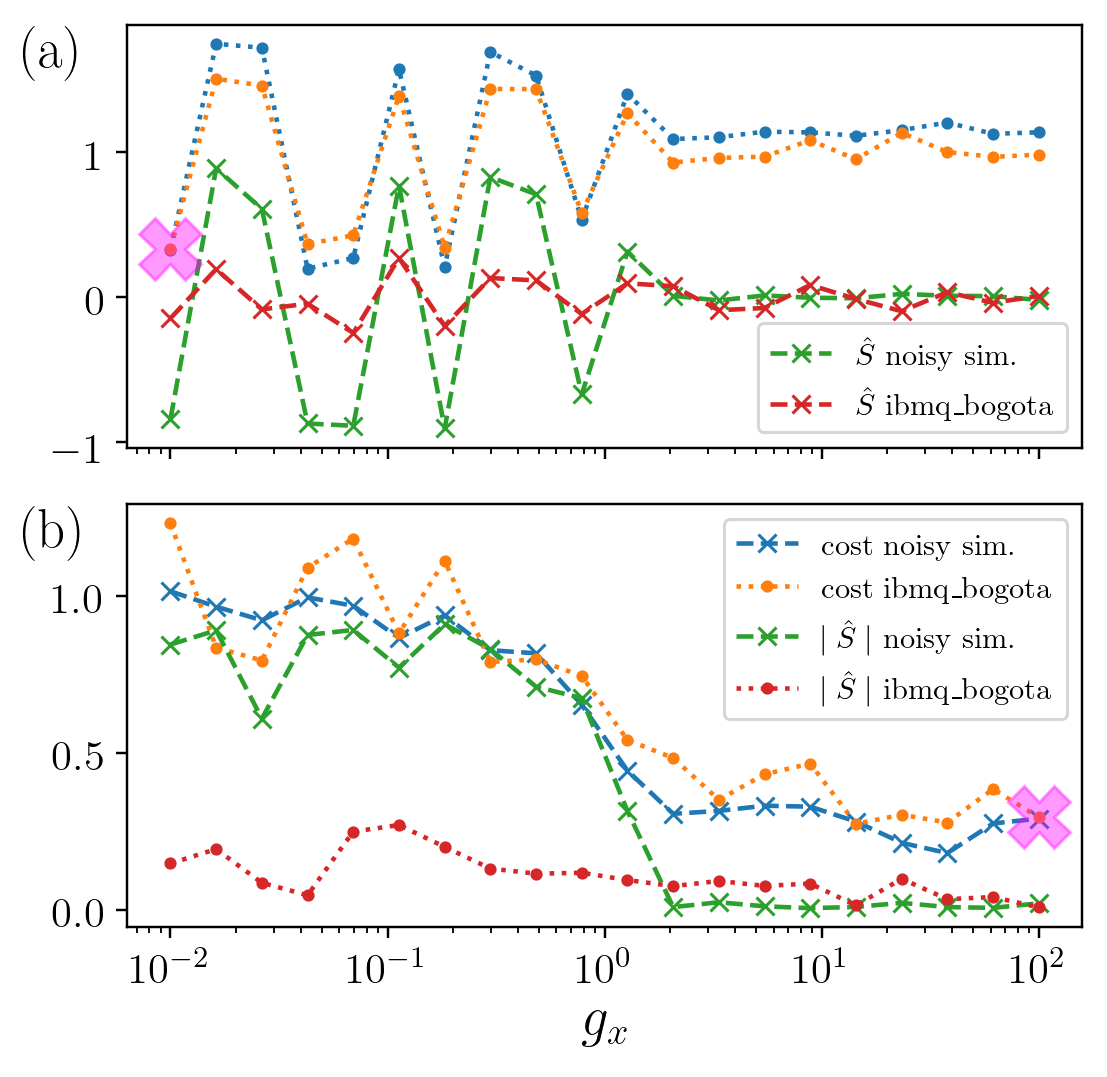

In [18]:
fig, axs = plt.subplots(nrows=2,figsize=(5,5),sharex=True,gridspec_kw={'height_ratios': [2, 2]},dpi=220)
ax = axs[0]
cost = np.load("data/" + "ibmq_antiferro-1D-load_simu" + "_thetas-loss-cost_run1.npz", allow_pickle=True)["cost_mitigated"]
ax.plot(gx_list, cost,".:")#, label="loss noisy sim.")

cost = np.load("data/" + name + "_thetas-loss-cost_run1.npz", allow_pickle=True)["cost_mitigated"]
ax.plot(gx_list, cost,".:")#, label="loss ibmq_bogota")

ax.plot(gx_list, Qmags,"x--", label="$\hat{S}$ noisy sim.")
ax.plot(gx_list, Qmags_executed,"x--", label="$\hat{S}$ ibmq$\_$bogota")
ax.set_xscale("log")
ax.plot(gx_list[0],cost[0], "X",markersize=20,alpha=0.4,color="magenta")

ax = axs[1]
cost = np.load("data/" + "ibmq_antiferro-1D-load_simu" + "_thetas-loss-cost_run2.npz", allow_pickle=True)["cost_mitigated"]
ax.plot(gx_list, cost,"x--", label="cost noisy sim.")

cost = np.load("data/" + name + "_thetas-loss-cost_run2.npz", allow_pickle=True)["cost_mitigated"]
ax.plot(gx_list, cost,".:", label="cost ibmq$\_$bogota")

ax.plot(gx_list, abs(Qmags),"x--", label="$\mid \hat{S} \mid$ noisy sim.")
ax.plot(gx_list, abs(Qmags_executed),".:", label="$\mid \hat{S} \mid$ ibmq$\_$bogota")
ax.set_xscale("log")
ax.plot(gx_list[-1],cost[-1],"X",markersize=20,alpha=0.4,color="magenta")
for ax in axs:
    ax.legend()
    ax.tick_params(labelsize=14)
axs[-1].set_xlabel("$g_x$", fontsize=18)

plt.tight_layout()

axs[0].text(-0.11,0.9,"(a)", fontweight="bold", size=18, transform = axs[0].transAxes)
axs[1].text(-0.11,0.9,"(b)", fontweight="bold", size=18, transform = axs[1].transAxes)
plt.savefig("plots/" + name + "_mainplot.png", bbox_inches='tight')
plt.savefig("plots/" + name + "_mainplot.pdf", bbox_inches='tight')